# KE transfer between eddy and LS mean shearflow

### The goal is to compute its strength relative to buoyancy-w correlation in the volumetric KE budget of a convecting cyclone in shear. This copies some derivations from a [Mapes-Cheedela cumulus friction paper](https://www.overleaf.com/project/5e4d6f1262f6f40001fdda9d)

### Derivation: downshear/upshear flux as a KE sink/source

The horizontal momentum budget, averaged over some horizontal filter scale (denoted by an overbar $\overline{\psi}$) has a vertical eddy flux convergence term (first here), among its other tendency terms such as large scale advection (ADV), the pressure gradient force (PGF), and horizontal eddy flux convergence: 

$$
\frac {\partial }{\partial t}(\overline{\vec{V}}) = -\frac{1}{\rho_0} \frac{\partial}{\partial z} (\overline{\rho_0 \vec{V}'w'}) + ADV + PGF - \nabla_h \cdot (\vec{V}'\vec{V}') + ...
$$

For clarity and coding ease, Here we take $\rho_0(z)$ to be a constant reference profile, and use hydrostatic pressure (simply denoted p) as a vertical coordinate, so $dp = -\rho_0 g dz$ and $\omega \equiv dp/dt = -\rho_0 g w$. The first term, Eddy Momentum Convergence (EMC), can then be written in terms relevant to our pressure-coordinate model data: 

$$
EMC = -\frac{1}{\rho_0} \frac{\partial}{\partial z} \overline{(\rho_0 \vec{V}'w')} = g \frac{\partial}{\partial p} (\overline{\rho_0 \vec{V}'w'})
$$


The KE equation for filter-scale wind (here, the domain-averaged shearflow) is obtained by dot product with $\vec V$. In the Schechter simulations, the domain-mean shear is purely zonal $U(p)$, so the equation reduces to scalar form. 

$$
\frac {\partial }{\partial t}(\overline{U}^2/2) = EMC \cdot \overline{U}(p) + ...
$$

Vertical transports of KE are facile, so we want to study the stable mass-averaged <> quantity $<KE> \equiv 1/p_s \int_{0}^{p_s}(KE) dp $, whose budget contribution by EMC is: 

$$\frac {\partial }{\partial t}<(\overline{U}^2/2)>$$

$$= <(EMC) \overline U> + ...$$

$$= <g \frac{\partial}{\partial p} (\overline{\rho_0 \vec{V}'w'}) \cdot \overline{U}> + ...$$

**Force dotted into velocity** is the interpretation of the above KE source term. 

Averaging over mass (integrating  with dp) replaces the p derivative with boundary values (surface stress $\tau_{s}$), so the RHS term can be rewritten, through integration by parts, as: 

$$
= <\frac{\partial \overline{U}}{\partial p} \cdot (g \rho_0 \overline{\vec{V}'w'})> + \tau_{s} \overline{U}(p_s) + ...
$$

**Downgradient flux** is the interpretation of the above KE source term, with surface stress as a separate thing. 

This has all been written in terms of the KE budget of filter-scale (here domain-mean) flow for convenience. But since total KE = (filter-scale KE) + (EddyKE) since $\overline{  \overline U \cdot u' } = 0$, eddy vertical momentum transport is a *conversion* process between mean-flow KE and EKE. If our interest is the eddy (a cyclone plus its fine structure), a simple sign flip is the meaningful quantity. 


Meanwhile, the buoyancy force generates total-flow KE at the rate $<\overline{b'w'}> = <\overline{bw}>$ since $\overline w = 0$ in these periodic-domain simulations. All this buoyancy driving of KE goes into EKE, not into the mean shearflow. 

$W kg^{-1}$ is the unit of these <EKE> rates of change, averaged (not integrated) over the column mass. 


In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
!ls /Users/bmapes/Box/Schechter_cyclone_shear_formapes/anl

cm1out_000083.nc cm1out_000098.nc


In [4]:
ds = xr.open_dataset('/Users/bmapes/Box/Schechter_cyclone_shear_formapes/anl/cm1out_000083.nc')
ds

<xarray.Dataset> Size: 1GB
Dimensions:   (one: 1, time: 1, ni: 444, nip1: 445, nj: 444, njp1: 445, nk: 40,
               nkp1: 41)
Coordinates:
  * time      (time) timedelta64[ns] 8B 4 days 07:00:00
Dimensions without coordinates: one, ni, nip1, nj, njp1, nk, nkp1
Data variables: (12/93)
    f_cor     (one) float32 4B ...
    ztop      (one) float32 4B ...
    xh        (ni) float32 2kB ...
    xf        (nip1) float32 2kB ...
    yh        (nj) float32 2kB ...
    yf        (njp1) float32 2kB ...
    ...        ...
    khh       (time, nkp1, nj, ni) float32 32MB ...
    khv       (time, nkp1, nj, ni) float32 32MB ...
    dissten   (time, nkp1, nj, ni) float32 32MB ...
    nm        (time, nkp1, nj, ni) float32 32MB ...
    defv      (time, nkp1, nj, ni) float32 32MB ...
    defh      (time, nkp1, nj, ni) float32 32MB ...
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.8916739
    cgt2:         -1.2868382
    cgt3:         0.3951643
    dgt1:         2.042509
    dgt2:         -3.0983832
    dgt3:         1.0558741

Text(0.5, 1.0, 'sqrt(mesh areas) in km ')

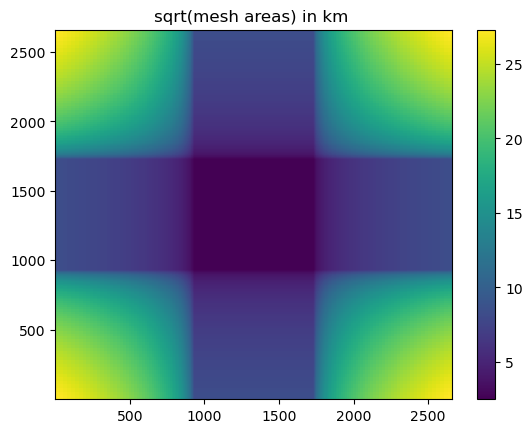

In [105]:
# Mesh size quick look 
Aw = (ds.xh.differentiate(coord='ni')   * ds.yh.differentiate(coord='nj'))
plt.pcolormesh(ds.xh, ds.yh, np.sqrt(Aw)); plt.colorbar(); plt.title('sqrt(mesh areas) in km ')

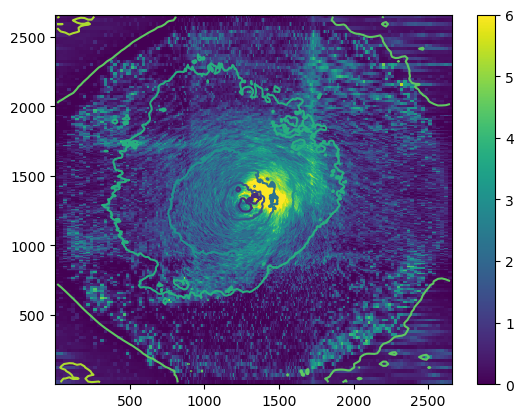

In [459]:
# Quick look at sqrt(rainfall)and surface pressure 
plt.pcolormesh(ds.xh, ds.yh, np.sqrt(ds.rain[0]),vmax=6 ); plt.colorbar()
plt.contour(ds.xh, ds.yh, ds.psfc[0]);

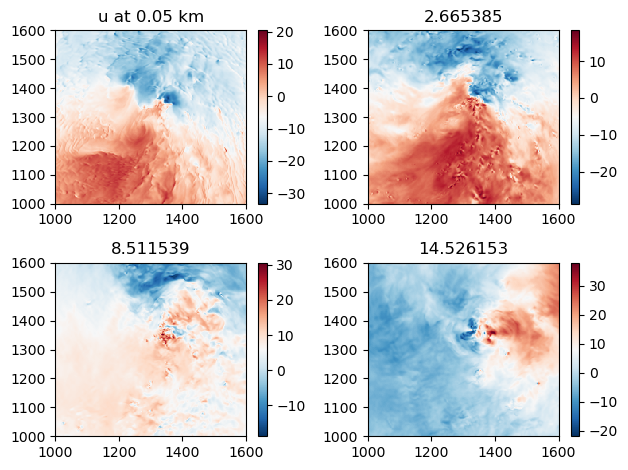

In [284]:
# Inner area closer look: u field. Mainly circulatory at low levels, but divergent at the top! 

plt.subplot(221)
plt.pcolormesh(ds.xf, ds.yh, ds.u[0][0], cmap='RdBu_r'); plt.colorbar();
plt.xlim([1000,1600]); plt.ylim([1000,1600]); 
plt.title('u at '+ str(ds.z[0].values)+' km' )

plt.subplot(222)
plt.pcolormesh(ds.xf, ds.yh, ds.u[0][10], cmap='RdBu_r'); plt.colorbar();
plt.xlim([1000,1600]); plt.ylim([1000,1600]);
plt.title( str(ds.z[10].values) )

plt.subplot(223)
plt.pcolormesh(ds.xf, ds.yh, ds.u[0][20], cmap='RdBu_r'); plt.colorbar();
plt.xlim([1000,1600]); plt.ylim([1000,1600]);
plt.title( str(ds.z[20].values) )

plt.subplot(224)
plt.pcolormesh(ds.xf, ds.yh, ds.u[0][27], cmap='RdBu_r'); plt.colorbar();
plt.xlim([1000,1600]); plt.ylim([1000,1600]);
plt.title( str(ds.z[27].values) )

plt.tight_layout()

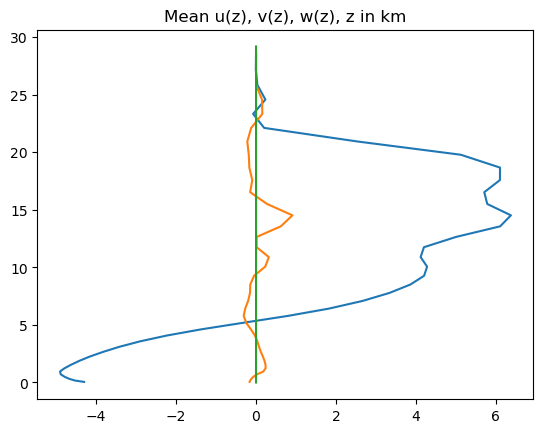

In [288]:
# Area-weighted mean wind profiles

# Define area-weighting factors for u and v. "h" indicates normal i,j while 'f' is for ip1 and jp1 and kp1
Au = (ds.xf.differentiate(coord='nip1') * ds.yh.differentiate(coord='nj'))
Av = (ds.xh.differentiate(coord='ni')   * ds.yf.differentiate(coord='njp1'))
Aw = (ds.xh.differentiate(coord='ni')   * ds.yh.differentiate(coord='nj'))

# Make a p coordinate for plots 
ds['p'] = (Aw * ds.prs[0]).mean(dim=['nj','ni']) / Aw.mean()
ds['pf'] = ds['p'].interp(nk=ds['nkp1'])

Uprof = (Au * ds.u[0]).mean(dim=['nj','nip1']) / Au.mean()
Vprof = (Av * ds.v[0]).mean(dim=['njp1','ni']) / Av.mean()
Wprof = (Aw * ds.w[0]).mean(dim=['nj','ni']) / Aw.mean()
Pprof = (Aw * ds.w[0]).mean(dim=['nj','ni']) / Aw.mean()

plt.plot(Uprof, ds.z); plt.title('Mean u(z), v(z), w(z), z in km')
plt.plot(Vprof, ds.z); 
plt.plot(Wprof, ds.zf); 

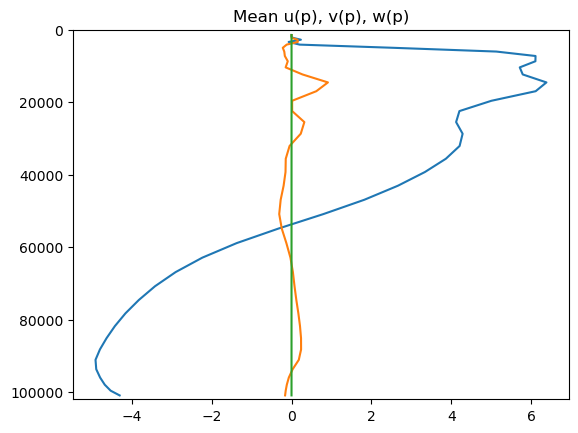

In [243]:
plt.plot(Uprof, ds.p); plt.title('Mean u(p), v(p), w(p)')
plt.plot(Vprof, ds.p); 
plt.plot(Wprof, ds.pf); 
plt.ylim([102000,0]);

In [113]:
# Subtract area-mean u profile to get 'up' variable

ds['up'] = ds['u']-Uprof

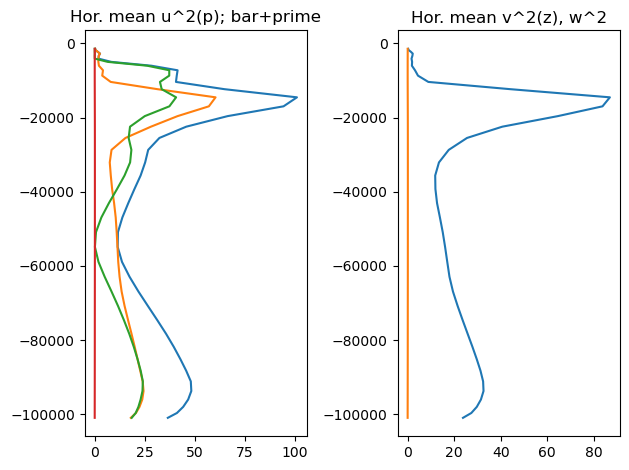

In [289]:
# Area weighted variance (2*KE) profiles 

U2prof = (Au * ds.u[0]* ds.u[0]).mean(dim=['nj','nip1']) / Au.mean()
Up2prof= (Au * ds.up[0]*ds.up[0]).mean(dim=['nj','nip1']) / Au.mean()
V2prof = (Av * ds.v[0]* ds.v[0]).mean(dim=['njp1','ni']) / Av.mean()
W2prof = (Aw * ds.w[0]* ds.w[0]).mean(dim=['nj','ni']) / Aw.mean()

plt.subplot(121)
plt.plot(U2prof, -ds.p); plt.title('Hor. mean u^2(p); bar+prime')
plt.plot(Up2prof, -ds.p); 
plt.plot(Uprof*Uprof, -ds.p); 
plt.plot(W2prof, -ds.pf); 

plt.subplot(122)
plt.plot(V2prof, -ds.p); plt.title('Hor. mean v^2(z), w^2')
plt.plot(W2prof, -ds.pf); 
plt.tight_layout();

#### Is it just a coincidence that $\overline u^2 = \overline{u'^2}$ at low levels??

# Kinetic energy budget terms 

1. buoyancy term bw (W/kg) 
2. momentum flux term SKEdot = $< -(\overline{u'\omega'})_p \cdot \overline{U}>$

In [290]:
# First, w'b', how big is it?

# GET DENSITY 
ds['thv'] = ds.th * (1 + 0.608*ds.qv)
ds['rho'] = ds.prs / (ds.th * (1 + 0.608*ds.qv)) / 287.   # rho = p/RT

# VPGF differs from g? No! So hydrostatic, or maybe prs was gotten hydrostatically
# ds['VPGF'] = ds.prs.differentiate('nk') / ds.zh.differentiate('nk') / rho  

# GET BUOYANCY
Rhoprof = (Aw * ds.rho[0]).mean(dim=['nj','ni']) / Aw.mean()
ds['b'] = -9.8 * (ds.rho - Rhoprof)/Rhoprof

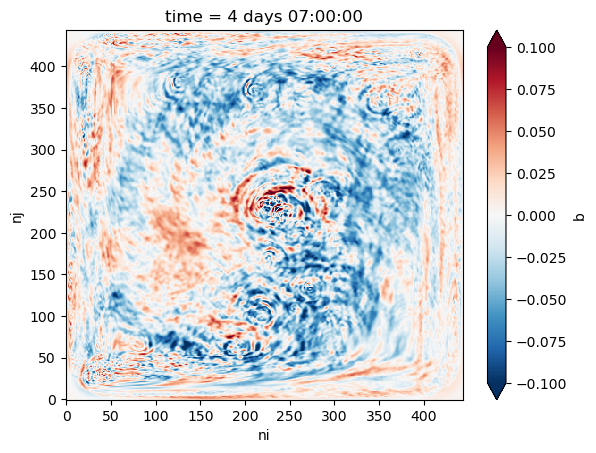

In [293]:
# stratospheric wave junk, tropospheric convection and warm core
ds.b[0][38].plot(vmin=-0.1, vmax=0.1, cmap='RdBu_r');

# Quantifying KE budget terms: first, $\rho b'w'$ 

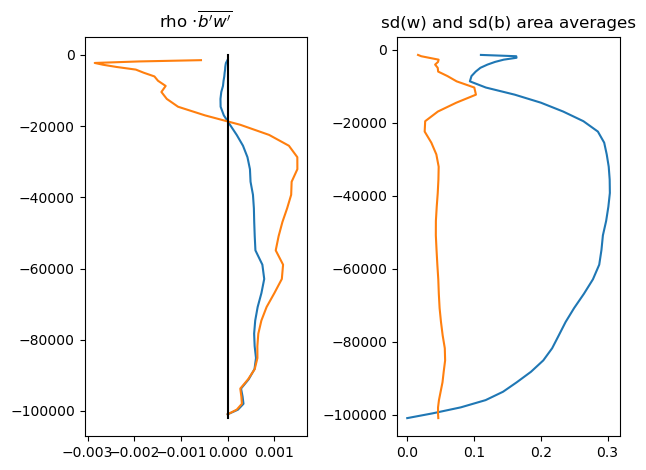

In [367]:
# MULTIPLY bw (W/kg), Interpolating b to w levels, and take horizontal mean 

ds['bw'] = ds['w'] * ds['b'].interp(nk=ds['nkp1'])
ds['rhobw'] = ds['bw'] * ds['rho'].interp(nk=ds['nkp1'])

BWprof = (Aw * ds.bw[0])        .mean(dim=['nj','ni']) / Aw.mean()
RBWprof= (Aw * ds.rhobw[0])     .mean(dim=['nj','ni']) / Aw.mean()
B2prof = (Aw * ds.b[0] *ds.b[0]).mean(dim=['nj','ni']) / Aw.mean()

plt.subplot(121) 
plt.plot(RBWprof, -ds.pf); plt.title("rho $\cdot \overline{b'w'}$")
plt.plot(BWprof, -ds.pf)
plt.plot([0,0],[-102000,0],'k')

plt.subplot(122)
plt.plot(np.sqrt(W2prof), -ds.pf); plt.title('sd(w) and sd(b) area averages')
plt.plot(np.sqrt(B2prof), -ds.p); 

plt.tight_layout()

In [454]:
# Smooth b and w to isolate cyclone-scale eddy energy generation 
from scipy.ndimage import gaussian_filter as smoo 

ilev = 5

BWS = smoo( ds['w'][0][ilev],10 ) * smoo( ds['b'].interp(nk=ds['nkp1'])[0][10],10 )
BWSmean = (Aw * BWS).mean(dim=['nj','ni']) / Aw.mean()
print, (BWmean/BWprof[ilev].values).values

(<function print>, array(0.61299998))

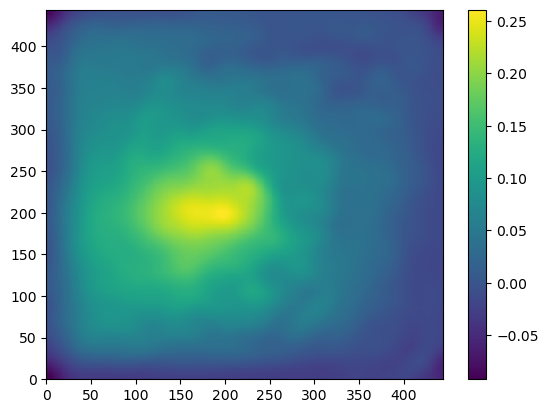

In [442]:
plt.pcolormesh( smoo(ds.b[0][10],9) ); plt.colorbar()

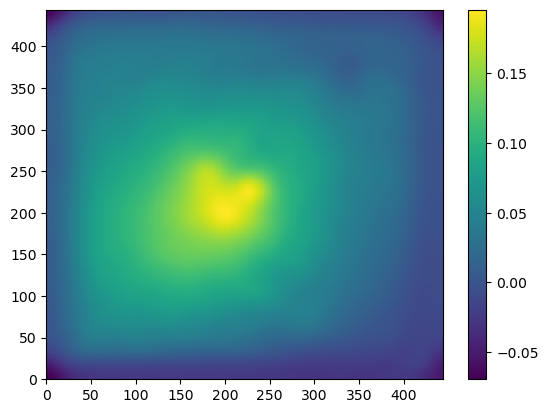

In [441]:
plt.pcolormesh( smoo(ds.b[0],9)[10] ); plt.colorbar()

In [432]:
smoo(ds.b[0][10],10)

array([[-0.08744722, -0.08719747, -0.0867013 , ..., -0.05394709,
        -0.05432334, -0.0545138 ],
       [-0.08722568, -0.0869761 , -0.08648027, ..., -0.05396381,
        -0.05434313, -0.05453515],
       [-0.08678462, -0.08653539, -0.08604027, ..., -0.05399535,
        -0.05438074, -0.05457582],
       ...,
       [-0.08128179, -0.08102039, -0.08050079, ..., -0.06226298,
        -0.06274156, -0.06298336],
       [-0.08177469, -0.08151351, -0.08099433, ..., -0.06230481,
        -0.0627798 , -0.06301981],
       [-0.08202228, -0.08176121, -0.08124226, ..., -0.06232502,
        -0.06279819, -0.06303728]], dtype=float32)

# Vertical mean value: about 0.0003 W/kg or m2/s3

# Now the momentum flux term:

In [304]:
# TERM 2. u'w' as a SKEdot term 
# Interpolate upert to w grid and multiply

ds['wu']    = ds.w * ds['up'].interp(nk=ds['nkp1'], nip1=ds['ni'])
ds['rhowu'] = ds.wu * Rhoprof.interp(nk=ds['nkp1'])

WUprof =  (Aw * ds.wu[0])   .mean(dim=['nj','ni']) / Aw.mean()
RWUprof = (Aw * ds.rhowu[0]).mean(dim=['nj','ni']) / Aw.mean()

In [343]:
EMCprof = RWUprof.differentiate(coord='nk')/ds.pf.differentiate(coord='nk') * 9.8  # m/s/s accel

EMCprof

<xarray.DataArray (nkp1: 41)> Size: 328B
array([-1.07562703e-04, -7.53779788e-05, -2.03773293e-05,  1.02032204e-05,
        7.79640436e-06,  4.00087562e-06,  9.89634239e-06,  1.18063204e-05,
        8.45421057e-06,  5.98662843e-06,  7.04951031e-06,  7.41451236e-06,
        7.22443507e-06,  8.12880178e-06,  4.33986311e-06,  3.19375444e-07,
        3.54803997e-06,  5.57234132e-06,  2.49634156e-07, -3.32151797e-06,
       -5.43933429e-07, -4.38225478e-07, -5.43660164e-06, -7.37460967e-06,
       -4.12840980e-06, -2.83814458e-06, -5.62960300e-06, -5.80699494e-06,
       -3.27080102e-06, -1.17015046e-06, -5.45333638e-07, -1.08615563e-06,
       -1.50724689e-06, -1.17114350e-06,  3.42047444e-07, -4.02947948e-07,
       -1.56483445e-06, -2.72403476e-06, -3.42009215e-06,             nan,
                   nan])
Coordinates:
    time     timedelta64[ns] 8B 4 days 07:00:00
    nk       (nkp1) int64 328B 0 1 2 3 4 5 6 7 8 ... 32 33 34 35 36 37 38 39 40
Dimensions without coordinates: nkp1

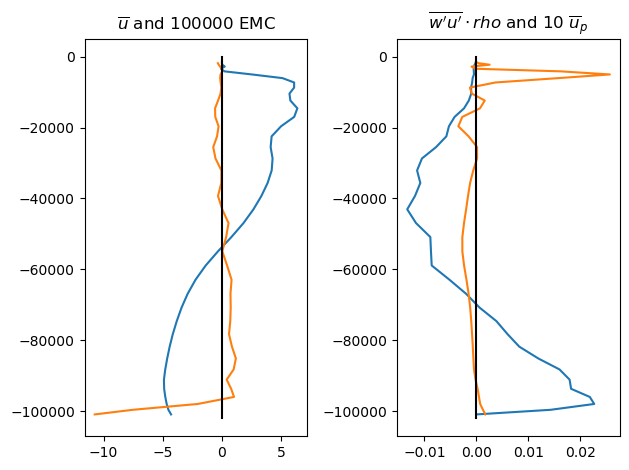

In [456]:
# The Energetics Terms we want: eyeball vertical mean of product 

Shearp = Uprof.differentiate(coord='nk')/ds.p.differentiate(coord='nk')       # m/s per Pa
EMCprof = RWUprof.differentiate(coord='nk')/ds.pf.differentiate(coord='nk') * 9.8  # m/s/s accel

plt.subplot(121)
plt.plot(Uprof, -ds.p); plt.title('$\overline{u}$ and 100000 EMC')
plt.plot(EMCprof*100000, -ds.pf)
plt.plot([0,0],[-102000,0],'k')

plt.subplot(122)
plt.plot(RWUprof, -ds.pf); plt.title("$\overline{w'u'} \cdot rho$ and 10 $\overline{u}_p$");
plt.plot(Shearp *10, -ds.p);
plt.plot([0,0],[-102000,0],'k')

plt.tight_layout()

#### Term we want is either deriv(left) x right, or left x deriv(right). Both should add up the same in <> column mean. Here orange curves are the deriv() terms. Column integral of products are both negative here. Need to triple check units and signs.

In [378]:
EMCprof.values[0:39] * Uprof.values[0:39]

array([ 4.62586473e-04,  3.41118609e-04,  9.52245879e-05, -4.88682050e-05,
       -3.80952999e-05, -1.96214150e-05, -4.74417550e-05, -5.46390626e-05,
       -3.73621288e-05, -2.48740085e-05, -2.69341694e-05, -2.53178724e-05,
       -2.09413786e-05, -1.81463684e-05, -5.96014697e-06, -1.04459791e-07,
        2.83087077e-06,  1.01536523e-05,  6.64773761e-07, -1.10880143e-05,
       -2.10078982e-06, -1.84322603e-06, -2.32768947e-05, -3.03719624e-05,
       -1.73450135e-05, -1.41964164e-05, -3.43906875e-05, -3.70396541e-05,
       -1.89237435e-05, -6.68290613e-06, -3.32803918e-06, -6.63185229e-06,
       -7.72335524e-06, -2.97718395e-06,  6.96387000e-08,  2.91550955e-08,
       -3.67365715e-07, -9.26609342e-08,  1.45812069e-08])

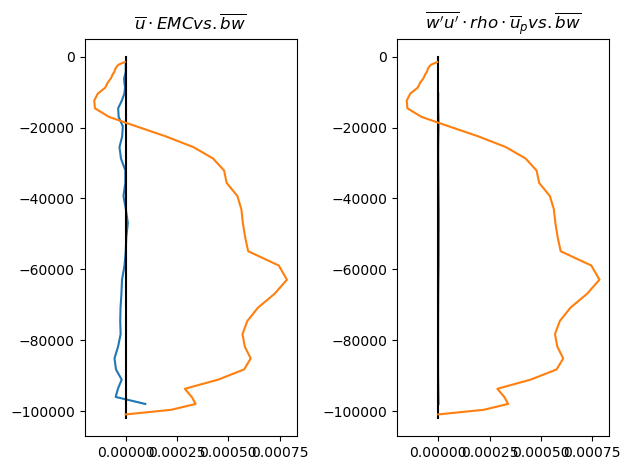

In [404]:
plt.subplot(121)
plt.plot(EMCprof.values[2:40] * Uprof.values[2:40], -ds.p.values[2:40])
plt.title('$\overline{u} \cdot EMC vs. \overline{bw}$')
plt.plot([0,0],[-102000,0],'k')
plt.plot(RBWprof, -ds.pf)


plt.subplot(122)
plt.plot(RWUprof.values[2:30] * Shearp.values[2:30], -ds.p.values[2:30])
plt.title("$\overline{w'u'} \cdot rho \cdot \overline{u}_p  vs. \overline{bw}$");
plt.plot([0,0],[-102000,0],'k')
plt.plot(RBWprof, -ds.pf)

plt.tight_layout()

# Needs units checks and stuff: bw term was 0.0003 = 3e-4

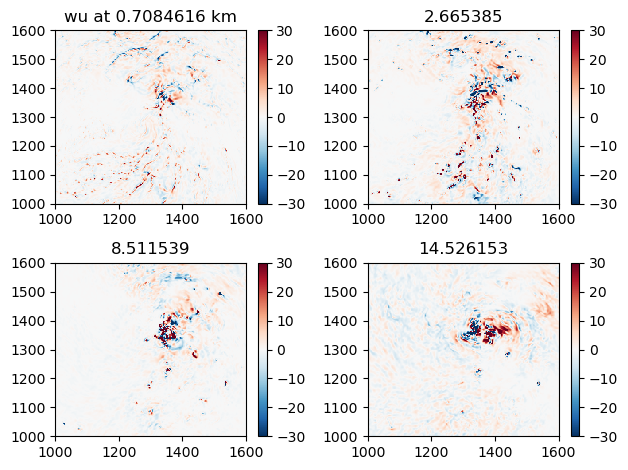

In [358]:
# Glance at the patterns and nature of u'w'. 
# Cumuli carrying area-typical momentum from below? ("friction", albiet slightly penetrative)?
# Or the asymmetric cyclone updraft carrying its sectoral momentum anomaly? 

plt.subplot(221)
plt.pcolormesh(ds.xh, ds.yh, ds.wu[0][4], cmap='RdBu_r',vmin=-30,vmax=30); plt.colorbar();
plt.xlim([1000,1600]); plt.ylim([1000,1600]); 
plt.title('wu at '+ str(ds.z[4].values)+' km' )

plt.subplot(222)
plt.pcolormesh(ds.xh, ds.yh, ds.wu[0][10], cmap='RdBu_r',vmin=-30,vmax=30); plt.colorbar();
plt.xlim([1000,1600]); plt.ylim([1000,1600]);
plt.title( str(ds.z[10].values) )

plt.subplot(223)
plt.pcolormesh(ds.xh, ds.yh, ds.wu[0][20], cmap='RdBu_r',vmin=-30,vmax=30); plt.colorbar();
plt.xlim([1000,1600]); plt.ylim([1000,1600]);
plt.title( str(ds.z[20].values) )

plt.subplot(224)
plt.pcolormesh(ds.xh, ds.yh, ds.wu[0][27], cmap='RdBu_r',vmin=-30,vmax=30); plt.colorbar();
plt.xlim([1000,1600]); plt.ylim([1000,1600]);
plt.title( str(ds.z[27].values) )

plt.tight_layout()

#### Both/and, of course. 'Cumulus friction' on $\bar u$ surely present; but also cyclone-scale asymmetry. 
#### These differ in which scale (cell vs. cyclone) is exchanging energy with the mean shear. 
#### And then there is cumulus friction on the cyclone-scale flow too, surely. 
#### Gonna need more diagnosis. 